In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop,Adam
import pandas as pd
import numpy as np

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
file_path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(file_path, header=None)
df.columns = headers
df.replace("?", np.nan, inplace = True)
df["price"] = pd.to_numeric(df["price"])
df["horsepower"] = pd.to_numeric(df["horsepower"])
avg_price = df['price'].astype('float').mean(axis=0)
df['price'].replace(np.nan, round(avg_price), inplace=True)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, round(avg_horsepower), inplace=True)

In [3]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.253659,25.219512,30.751220,13207.126829
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.519219,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


In [4]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500,19,25,15250.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500,19,25,18920.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500,16,22,13207.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


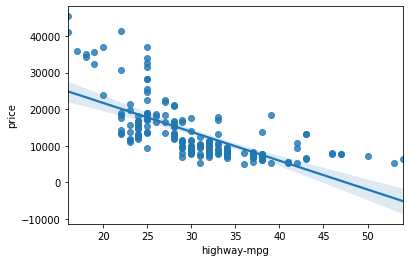

In [7]:
import seaborn as sns
ax=sns.regplot(x='highway-mpg',y='price',data=df)

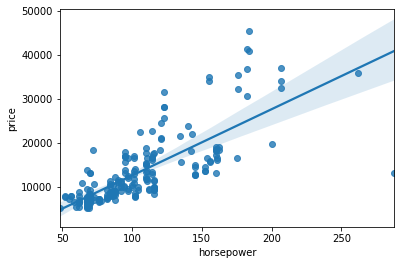

In [8]:
ax=sns.regplot(x='horsepower',y='price',data=df)

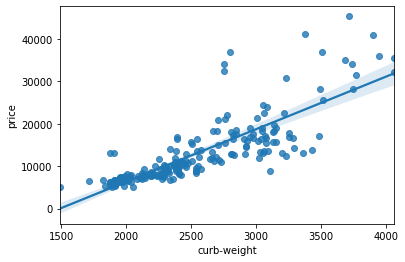

In [9]:
ax=sns.regplot(x='curb-weight',y='price',data=df)

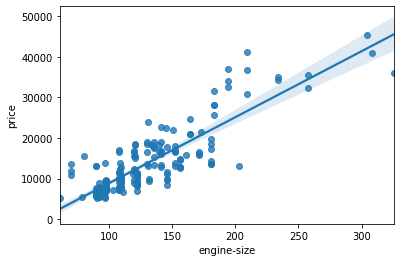

In [10]:
ax=sns.regplot(x='engine-size',y='price',data=df)

In [11]:
from sklearn.model_selection import train_test_split
x=df[['highway-mpg','horsepower','curb-weight', 'engine-size']]
y=df['price']
#split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [12]:
model=keras.Sequential([keras.layers.Dense(1,input_shape=[4,])])
model.compile(optimizer=Adam(0.1),loss='mean_squared_error')
history=model.fit(x_train,y_train,validation_split=0.25,epochs=50)


Epoch 1/50
4/4 [==============================] - 0s 40ms/step - loss: 205703888.0000 - val_loss: 185099536.0000
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 177791072.0000 - val_loss: 158420512.0000
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 149618928.0000 - val_loss: 135195200.0000
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 127269600.0000 - val_loss: 114649200.0000
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 107636000.0000 - val_loss: 96944192.0000
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 91297928.0000 - val_loss: 81960416.0000
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 76065912.0000 - val_loss: 69919176.0000
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 65964088.0000 - val_loss: 60005996.0000
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 55622408.0000 - val_loss: 52585236.0000


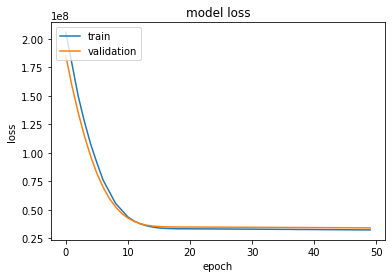

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
print(model.predict([[27,111,2548,130]]))

[[14026.994]]


In [15]:
#coefficients of the model
print('Coefficients: \n',model.get_weights())

Coefficients: 
 [array([[-0.08820112],
       [ 6.0395765 ],
       [ 4.861606  ],
       [ 7.456666  ]], dtype=float32), array([2.243769], dtype=float32)]


In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_prediction=model.predict(x_test)
print(r2_score(y_prediction,y_test))
print(mean_absolute_error(y_prediction,y_test))
print(mean_squared_error(y_prediction,y_test))

-2.106535481197637
4008.5867116044205
26944423.506096356


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
